In [ ]:
! pip install nltk gensim

  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ------ --------------------------------- 4.2/24.0 MB 28.1 MB/s eta 0:00:01
   -------- ------------------------------- 5.0/24.0 MB 12.1 MB/s eta 0:00:02
   ------------------ --------------------- 11.0/24.0 MB 17.2 MB/s eta 0:00:01
   ----------------------------------- ---- 21.5/24.0 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 24.5 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ------- -------------------------------- 8.9/46.2 MB 46.0 MB/s eta 0:00:01
   ------------- -------------------------- 16.0

In [2]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\i-dle\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [3]:
from nltk.corpus import brown

print(brown.categories())

sentences = brown.sents()
print(sentences[:3])

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "'

In [4]:
import re
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(sentence):
    return [re.sub(r'[^a-z]', '', w.lower()) for w in sentence if w.isalpha() and w.lower() not in stop_words]

processed_sentences = [preprocess(s) for s in sentences]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\i-dle\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=processed_sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4, 
    sg=1 
)

In [6]:
model.save("brown_word2vec.model")
model = Word2Vec.load("brown_word2vec.model")

In [ ]:
print("--- 단어 유사도 예시 ---")
print(model.wv.most_similar("money"))
print(model.wv.most_similar("government"))


print("--- 단어 벡터 예시 ---")
print(model.wv['money'][:10])  # 앞 10차원만 확인
print(model.wv.most_similar(positive=['king','woman'], negative=['man']))

[('buy', 0.9163288474082947), ('call', 0.9003444910049438), ('earn', 0.881751298904419), ('probably', 0.8796035051345825), ('refused', 0.8785105347633362), ('fair', 0.8784470558166504), ('want', 0.8780184984207153), ('decided', 0.8779001235961914), ('expected', 0.8765968680381775), ('job', 0.8760935068130493)]
[('federal', 0.9440683722496033), ('foreign', 0.9411236047744751), ('constitution', 0.9398396611213684), ('india', 0.9387828707695007), ('jurisdiction', 0.9349255561828613), ('rights', 0.9345338344573975), ('claims', 0.933124303817749), ('governments', 0.9317177534103394), ('union', 0.9311038255691528), ('authorized', 0.9284921288490295)]
[-0.24056914  0.35980895 -0.0949569   0.3793528  -0.03936518 -0.23657712
  0.3789111   0.2638004  -0.19725063 -0.17608172]
[('sister', 0.919752836227417), ('audience', 0.9143310189247131), ('playing', 0.9140722751617432), ('lucy', 0.9128169417381287), ('anne', 0.9121008515357971), ('younger', 0.9116422533988953), ('golf', 0.9094809293746948), ('

In [11]:
! pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ------------------ --------------------- 4.2/8.9 MB 20.9 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 24.0 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   ----------------

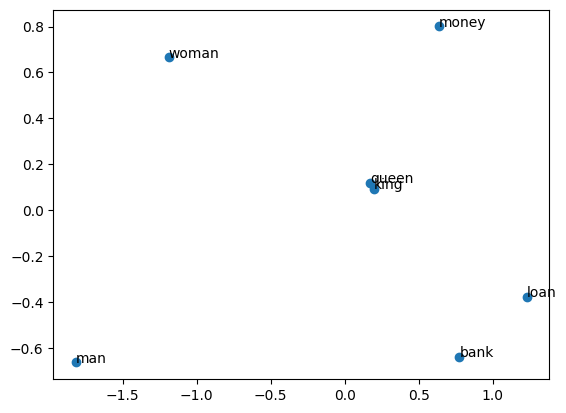

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ['money','bank','loan','king','queen','man','woman']
vectors = [model.wv[w] for w in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()
